In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

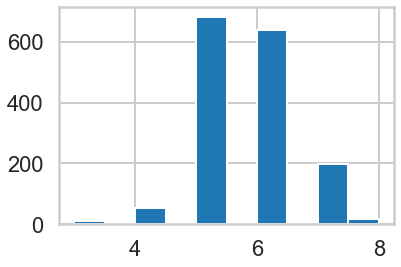

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.13660062565172054
% Good wines in Testing: 0.134375


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 7, 'min_samples_leaf': 3} 0.29690344035239796 {'mean_fit_time': array([0.00170355, 0.00161099, 0.00146561, 0.0012794 , 0.00126448,
       0.00099578, 0.00123234, 0.00191588, 0.00119734, 0.00140209,
       0.00121117, 0.00097833, 0.00152559, 0.00186586, 0.00176587,
       0.00162492, 0.00156703, 0.00178571, 0.00205026, 0.00200214,
       0.00160418, 0.00183821, 0.00199432, 0.00179877, 0.00199409,
       0.00193233, 0.00199137, 0.0017951 , 0.00239372, 0.00119715,
       0.00199513, 0.00179539, 0.00179539, 0.00159569, 0.00139623,
       0.00139637, 0.00139594, 0.00159597, 0.00219383, 0.00148368,
       0.00159583, 0.00159588]), 'std_fit_time': array([3.67389690e-04, 5.06074871e-04, 5.86676407e-04, 3.95578525e-04,
       4.12872438e-04, 1.51240840e-06, 3.82324644e-04, 1.87939146e-04,
       4.02812631e-04, 3.87280124e-04, 4.25816063e-04, 3.79918641e-05,
       3.63333312e-04, 2.38263413e-04, 3.89310269e-04, 3.80435453e-04,
       4.61047795e-04, 3.85928041e-04

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


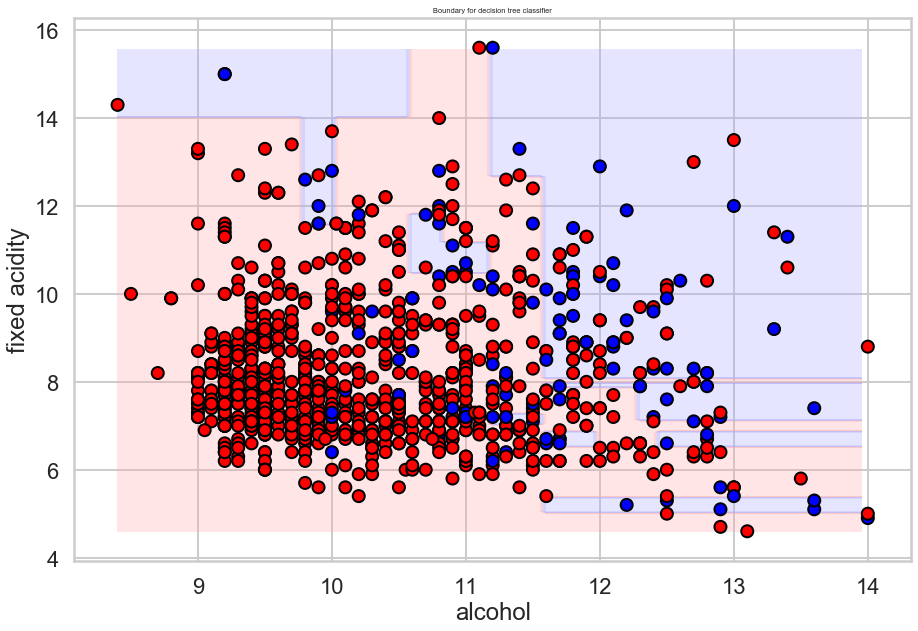

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

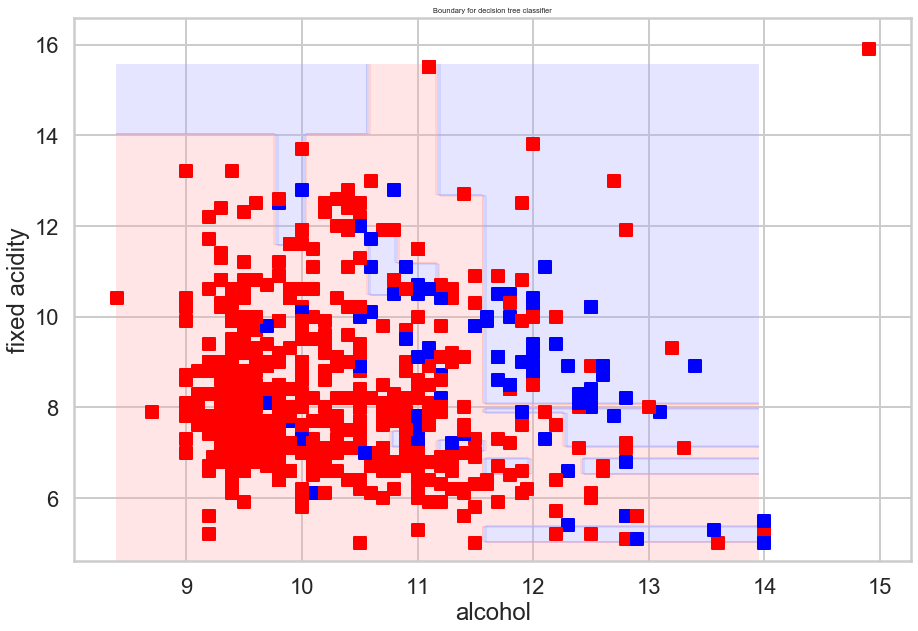

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 6} 0.27158631564586366 {'mean_fit_time': array([0.00258942, 0.00234509, 0.0015976 ]), 'std_fit_time': array([0.00048533, 0.00037774, 0.00048966]), 'mean_score_time': array([0.00299354, 0.00248351, 0.00159388]), 'std_score_time': array([0.00063091, 0.0008923 , 0.00049041]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.11428571, 0.16666667, 0.28571429]), 'split1_test_score': array([0.10909091, 0.16949153, 0.23333333]), 'split2_test_score': array([0.34146341, 0.40909091, 0.37209302]), 'split3_test_score': array([0.3287

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


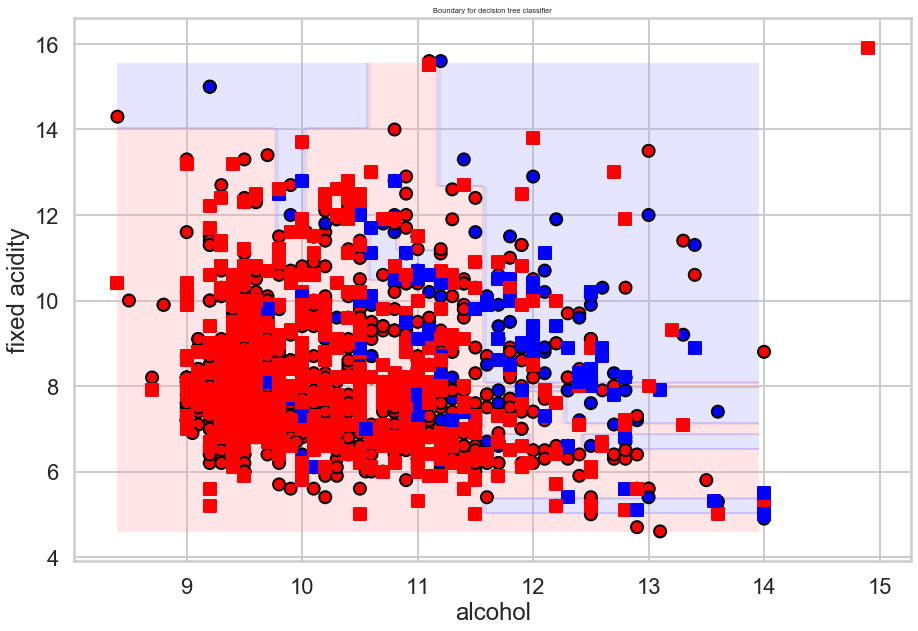

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 7, 'min_samples_leaf': 4} 0.43413508434051223 {'mean_fit_time': array([0.00300922, 0.00318551, 0.00339351, 0.0025341 , 0.00306177,
       0.00275636, 0.00302796, 0.00272241, 0.00278502, 0.00304298,
       0.00386882, 0.00376725, 0.00437145, 0.0041944 , 0.00481095,
       0.00376287, 0.00398231, 0.0038816 , 0.00404649, 0.00347247,
       0.00454793, 0.00485826, 0.00538497, 0.00546837, 0.00598583,
       0.00528846, 0.00578313, 0.00561047, 0.00491905, 0.00578494,
       0.00640831, 0.00735173, 0.00676742, 0.00698152, 0.00660739,
       0.00783234, 0.00602002, 0.00643983, 0.00604172, 0.00557375,
       0.00757279, 0.00677419, 0.00654292, 0.00676866, 0.0067812 ,
       0.00679107, 0.00691214, 0.00617642, 0.00631552, 0.00624175,
       0.00809665, 0.00821848, 0.00777416, 0.00787182, 0.00780439,
       0.00738745, 0.00699024, 0.00672975, 0.00703626, 0.00723605,
       0.00800858, 0.00870981, 0.00871882, 0.00852661, 0.00777197,
       0.00738759, 0.00819292, 0.00

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 17} 0.35361081955979223 {'mean_fit_time': array([0.00682449, 0.01250887, 0.01817727, 0.02130003, 0.02498965,
       0.02791257, 0.03449678, 0.03696008, 0.03858728, 0.04168901,
       0.04647737, 0.0458776 , 0.05523891, 0.05789676, 0.0426856 ,
       0.04388247, 0.05543852, 0.07559762, 0.05944018]), 'std_fit_time': array([0.0010358 , 0.00073664, 0.0013321 , 0.00134763, 0.00217353,
       0.00207071, 0.00183617, 0.00229107, 0.00401505, 0.00116415,
       0.00101925, 0.00516157, 0.00078891, 0.00377595, 0.0031146 ,
       0.0006303 , 0.0074399 , 0.00171649, 0.00957892]), 'mean_score_time': array([0.00400681, 0.00421801, 0.00469971, 0.00497594, 0.00515051,
       0.00558429, 0.00518489, 0.00492845, 0.00478702, 0.00558481,
       0.00558338, 0.00519934, 0.00618367, 0.00553231, 0.00478764,
       0.00478706, 0.00538611, 0.00718083, 0.00538664]), 'std_score_time': array([0.00088952, 0.00038822, 0.00140248, 0.00121074, 0.00085825,
       0.00078979, 0.00097592, 

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


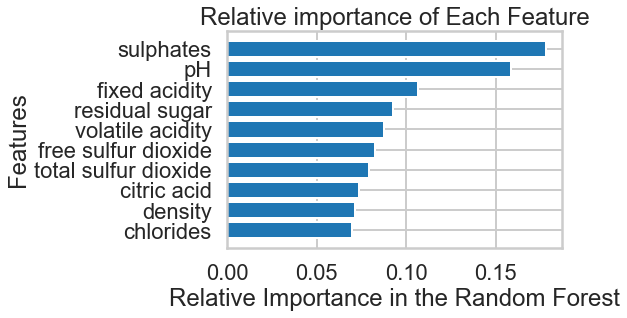

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'n_estimators': 46} 0.44461269388874985 {'mean_fit_time': array([0.04847369, 0.04813066, 0.04866786, 0.05327559, 0.05525775,
       0.05784574, 0.06782012, 0.0634315 , 0.06941547, 0.06739554,
       0.08795791, 0.07480044, 0.09995933, 0.09135509, 0.09635048,
       0.09574347, 0.09434781, 0.10053077, 0.10472136, 0.12367001,
       0.09733896, 0.11888108, 0.11888175, 0.14341602, 0.12745895,
       0.13264503, 0.15360169, 0.13703284, 0.15896683, 0.16287837,
       0.17570081, 0.18530326, 0.20080585, 0.19185529, 0.18957715,
       0.18150682, 0.18762531, 0.1908742 , 0.21223192, 0.27246008,
       0.29234824, 0.27027807, 0.21920738, 0.19892292, 0.21303077,
       0.17788806, 0.18073082, 0.18492131, 0.17972636, 0.1749393 ]), 'std_fit_time': array([0.00361274, 0.00561853, 0.00558711, 0.00262199, 0.0046574 ,
       0.00608277, 0.00937668, 0.01174419, 0.01062123, 0.01307089,
       0.00211746, 0.01357327, 0.00663228, 0.00540911, 0.00562403,
       0.01237689, 0.015407  , 0.0177674 , 0.01

[[520  34]
 [ 47  39]]
########################################################


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 4, 'n_estimators': 56} 0.3981960597468937 {'mean_fit_time': array([0.03490591, 0.03631058, 0.029146  , 0.03385167, 0.03371086,
       0.03248177, 0.03566761, 0.03570466, 0.03670111, 0.03590312,
       0.03573251, 0.03807874, 0.03931365, 0.03789873, 0.04917073,
       0.04159727, 0.04908514, 0.04837513, 0.04467969, 0.04639549,
       0.04747105, 0.04607682, 0.04687462, 0.04773889, 0.05024357,
       0.04986663, 0.04906921, 0.05738897, 0.05145259, 0.05344911,
       0.0437871 , 0.04196544, 0.04407659, 0.04687443, 0.04588771,
       0.047473  , 0.04906521, 0.04987664, 0.05168128, 0.05147095,
       0.05186114, 0.05349922, 0.05319304, 0.05665388, 0.06412992,
       0.05731063, 0.09519029, 0.07360787, 0.08893504, 0.08077607,
       0.07770643, 0.07854109, 0.07426891, 0.07704644, 0.07721353,
       0.07899728, 0.08497262, 0.08297281, 0.07997389, 0.07220683,
       0.06344953, 0.0588429 , 0.06769681, 0.07835736, 0.07640042,
       0.08914604, 0.08656802, 0.08713198, 0.08179

In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

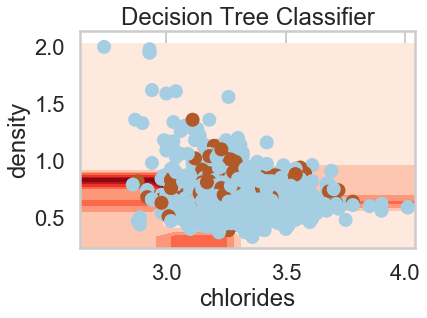

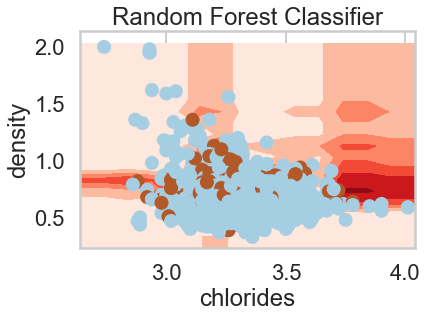

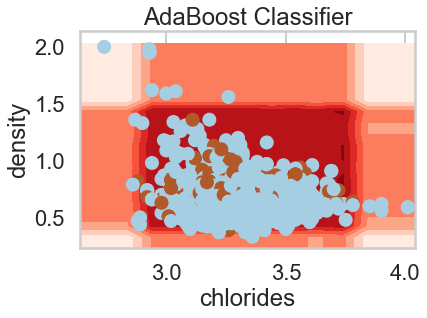

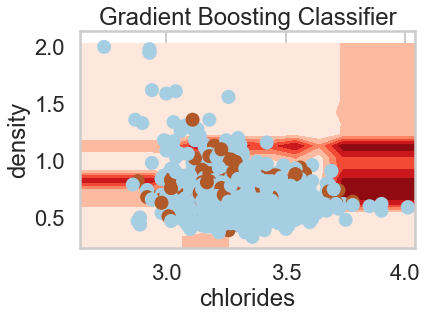

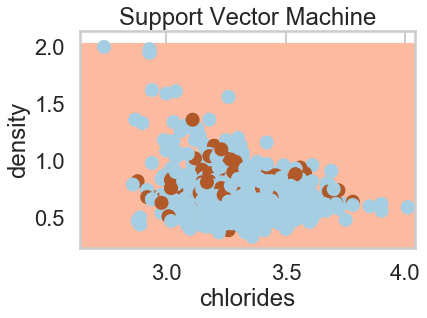

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32